In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('data/adapt.csv')
df

,size,pin,threads,runtime,usertime,energy
0,500,False,16,0.047608,0.725428,2.072321
1,500,False,16,0.047078,0.729377,2.071223
2,500,False,16,0.046912,0.729206,2.085566
3,500,False,16,0.046863,0.729402,2.038813
4,500,False,16,0.046995,0.729514,2.010187
...,...,...,...,...,...,...
1995,1500,True,13,1.995077,24.417774,79.424480
1996,1500,True,13,1.910386,24.253651,77.977156
1997,1500,True,13,1.993211,24.341170,79.073406
1998,1500,True,13,1.994703,24.355184,79.116985


In [76]:
def optimum(size, pin):
    match (size, pin):
        case (500, True):
            return 15
        case (500, _) | (750, _) | (1000, _):
            return 16
        case (1250, False) | (1500, False):
            return 8
        case (1250, True) | (1500, True):
            return 12
        case _:
            return -1

df['optimum'] = df.apply(lambda x: optimum(x['size'], x['pin']), axis=1)

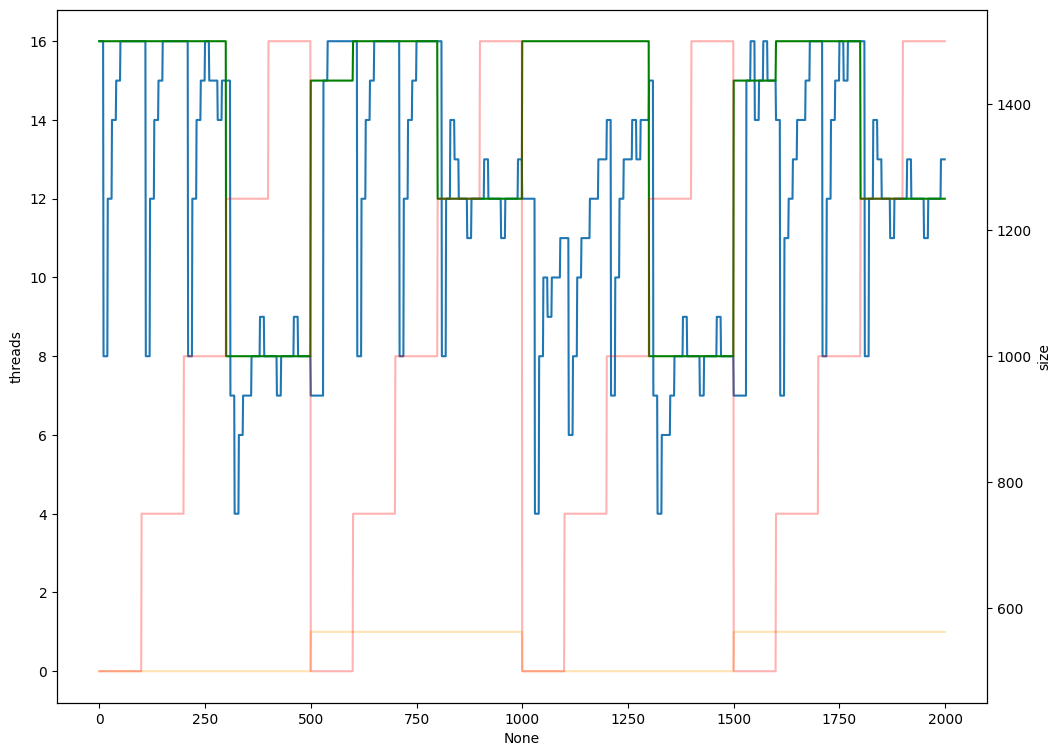

In [77]:
plt.figure(figsize=(12,9))

ax = sns.lineplot(df, x=df.index, y='threads')
sns.lineplot(df, x=df.index, y='optimum', color='g', ax=ax)

sns.lineplot(df, x=df.index, y='pin', color='orange', alpha=0.3, ax=ax)

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='size', color='r', alpha=0.3, ax=ax2)

plt.savefig('images/adapt.png')
plt.show()